In [153]:
import pickle
from scipy.stats import pearsonr,skew,kurtosis,norm
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import make_interp_spline, BSpline
import random

In [154]:
with open('deltaNFL.data', 'rb') as filehandle:
     deltaNFL = pickle.load(filehandle)
with open('dlpctNFL.data', 'rb') as filehandle:
     dlpctNFL = pickle.load(filehandle)

In [155]:
with open('deltaMLB.data', 'rb') as filehandle:
     deltaMLB = pickle.load(filehandle)
with open('dlpctMLB.data', 'rb') as filehandle:
     dlpctMLB = pickle.load(filehandle)

In [156]:
with open('deltaNHL.data', 'rb') as filehandle:
     deltaNHL = pickle.load(filehandle)
with open('dlpctNHL.data', 'rb') as filehandle:
     dlpctNHL = pickle.load(filehandle)

In [157]:
with open('deltaNBA.data', 'rb') as filehandle:
     deltaNBA = pickle.load(filehandle)
with open('dlpctNBA.data', 'rb') as filehandle:
     dlpctNBA = pickle.load(filehandle)

In [39]:
print('cnt:%s , avg:%s' % (len(dlpctMLB),int(statistics.mean(dlpctMLB))))
print('min:%s , max:%s' % (min(dlpctMLB),max(dlpctMLB)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctMLB),4),round(statistics.pvariance(dlpctMLB),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctMLB),4),round(kurtosis(dlpctMLB),4)))

cnt:1414 , avg:0
min:-0.54 , max:0.58
stdv:0.1134 , vrnc:0.0129
skew:0.0389 , kurt:1.888


In [35]:
print('cnt:%s , avg:%s' % (len(dlpctNFL),int(statistics.mean(dlpctNFL))))
print('min:%s , max:%s' % (min(dlpctNFL),max(dlpctNFL)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNFL),4),round(statistics.pvariance(dlpctNFL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNFL),4),round(kurtosis(dlpctNFL),4)))

cnt:1509 , avg:0
min:-0.5 , max:0.46
stdv:0.1085 , vrnc:0.0118
skew:-0.1261 , kurt:2.2231


In [37]:
print('cnt:%s , avg:%s' % (len(dlpctNHL),int(statistics.mean(dlpctNHL))))
print('min:%s , max:%s' % (min(dlpctNHL),max(dlpctNHL)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNHL),4),round(statistics.pvariance(dlpctNHL),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNHL),4),round(kurtosis(dlpctNHL),4)))

cnt:1217 , avg:0
min:-0.43 , max:0.47
stdv:0.0905 , vrnc:0.0082
skew:-0.009 , kurt:2.4614


In [38]:
print('cnt:%s , avg:%s' % (len(dlpctNBA),int(statistics.mean(dlpctNBA))))
print('min:%s , max:%s' % (min(dlpctNBA),max(dlpctNBA)))
print('stdv:%s , vrnc:%s' % (round(statistics.pstdev(dlpctNBA),4),round(statistics.pvariance(dlpctNBA),4)))
print('skew:%s , kurt:%s' % (round(skew(dlpctNBA),4),round(kurtosis(dlpctNBA),4)))

cnt:1318 , avg:0
min:-0.37 , max:0.28
stdv:0.0771 , vrnc:0.0059
skew:-0.1301 , kurt:1.9953


In [544]:
HIST_BINS = np.linspace(-.65, .65, 27)
HIST_BINS

array([-0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25,
       -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
        0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65])

In [594]:
nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNFL),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNFL),4) # standard deviation of distribution
y = norm.pdf(x, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [595]:
nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x1 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y1 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNBA),4) # mean of distribution
sigma = round(statistics.pstdev(dlpctNBA),4) # standard deviation of distribution
y1 = norm.pdf(x1, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [596]:
nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x2 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y2 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctNHL),4) # mean of distr`ibution
sigma = round(statistics.pstdev(dlpctNHL),4) # standard deviation of distribution
y2 = norm.pdf(x2, mu, sigma)

<Figure size 432x288 with 0 Axes>

In [597]:
nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x3 = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y3 = np.ravel(list(zip(nx_frac,nx_frac)))
mu = round(statistics.mean(dlpctMLB),4) # mean of distr`ibution
sigma = round(statistics.pstdev(dlpctMLB),4) # standard deviation of distribution
y3 = norm.pdf(x3, mu, sigma)

<Figure size 432x288 with 0 Axes>

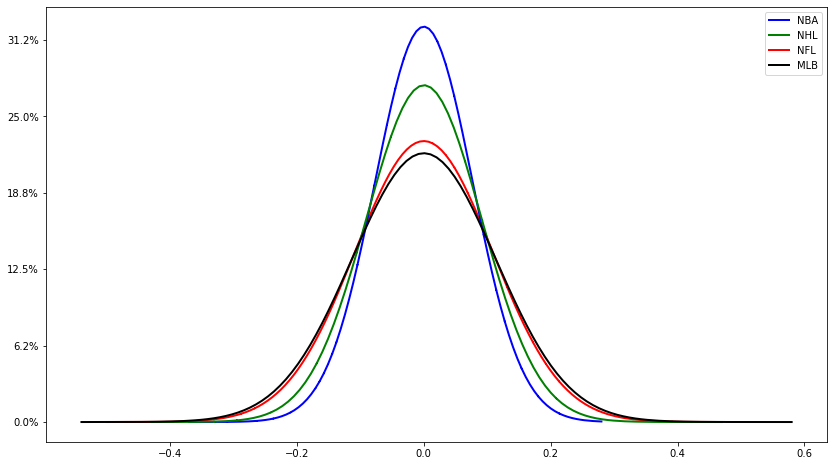

In [598]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.gca().yaxis.set_major_formatter(PercentFormatter(16))
nfl, = plt.plot(x, y, 'r-',label='NFL')
nba, = plt.plot(x1, y1, 'b-',label='NBA')
nhl, = plt.plot(x2, y2, 'g-',label='NHL')
mlb, = plt.plot(x3, y3, 'k-',label='MLB')
plt.legend(handles=[nba,nhl,nfl,mlb])
plt.show()

In [599]:
HIST_BINS = np.linspace(-.60, .60, 49)
HIST_BINS

array([-0.6  , -0.575, -0.55 , -0.525, -0.5  , -0.475, -0.45 , -0.425,
       -0.4  , -0.375, -0.35 , -0.325, -0.3  , -0.275, -0.25 , -0.225,
       -0.2  , -0.175, -0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,
        0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ])

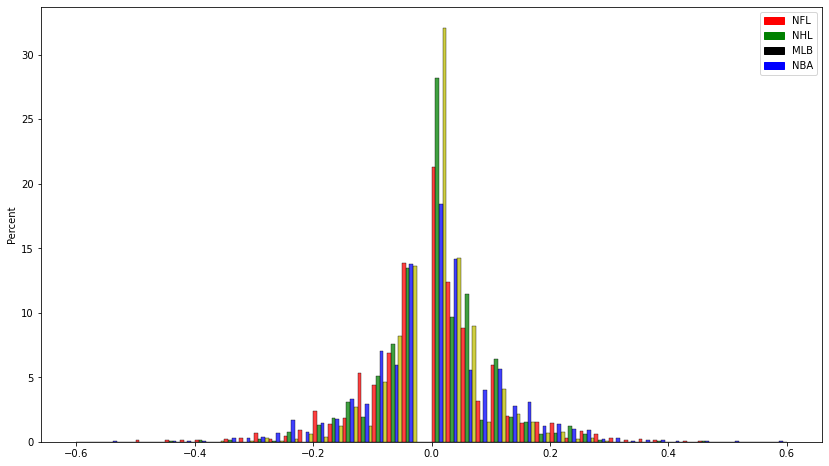

In [600]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='NFL')
blue_patch = mpatches.Patch(color='blue', label='NBA')
green_patch = mpatches.Patch(color='green', label='NHL')
cyan_patch = mpatches.Patch(color='black', label='MLB')
fig, ax = plt.subplots(figsize=(14, 8))
plt.legend(handles=[blue_patch,green_patch,cyan_patch,red_patch])
sports = [dlpctNFL,dlpctNHL,dlpctMLB,dlpctNBA]
sns.histplot(sports,bins=HIST_BINS,stat="percent",common_norm=False,common_bins=True,fill=True,element='bars',multiple='dodge')
ax.legend(handles=[red_patch,green_patch,cyan_patch,blue_patch])

<Figure size 432x288 with 0 Axes>

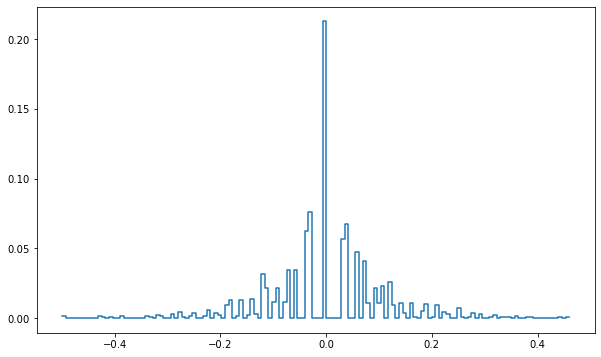

In [398]:
nx, xbins, ptchs = plt.hist(dlpctNFL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNFL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNFL,2*len((set(dlpctNFL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

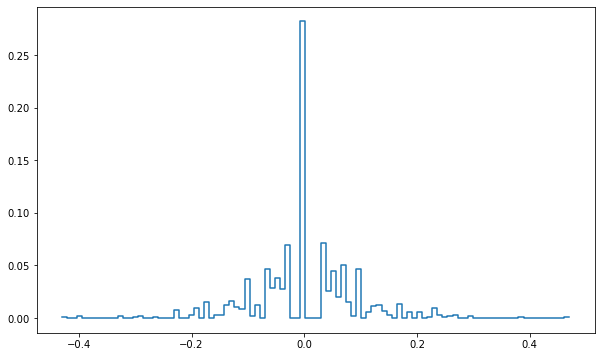

In [274]:
nx, xbins, ptchs = plt.hist(dlpctNHL,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNHL:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNHL,2*len((set(dlpctNHL))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

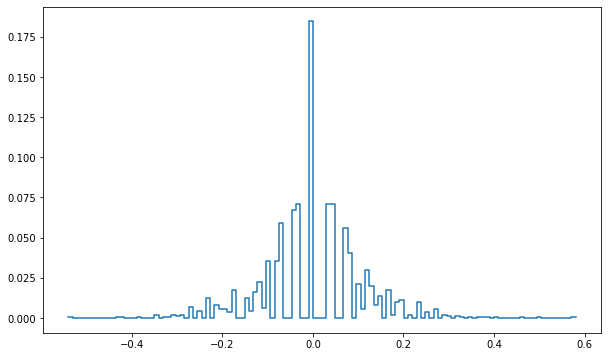

In [272]:
nx, xbins, ptchs = plt.hist(dlpctMLB,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctMLB:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctMLB,2*len((set(dlpctMLB))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

<Figure size 432x288 with 0 Axes>

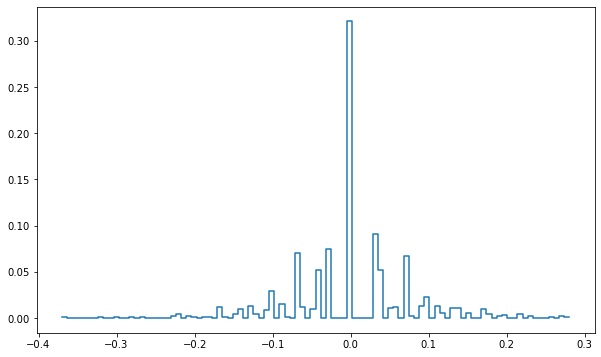

In [271]:
nx, xbins, ptchs = plt.hist(dlpctNBA,bins='auto',density=True)
plt.clf() # Get rid of this histogram since not the one we want.
wl=[]
for i in dlpctNBA:
    wl.append(sum(nx))
nx, xbins, ptchs = plt.hist(dlpctNBA,2*len((set(dlpctNBA))),weights=wl,density=True)    
plt.clf() # Get rid of this histogram since not the one we want.

nx_frac = nx/float(sum(nx)) # Each bin divided by total number of objects.
width = xbins[1] - xbins[0] # Width of each bin.
x = np.ravel(list(zip(xbins[:-1], xbins[:-1]+width)))
y = np.ravel(list(zip(nx_frac,nx_frac)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x,y)

In [159]:
nba=random.sample(dlpctNBA, 1000)

In [400]:
fuz=[]
for i in dlpctNBA:
    if (random.random()<.66):
        if (0<abs(i)<.04):
            fuz.append(i+.01*random.uniform(-3,3))
        elif (0==i):
            fuz.append(i+.01*random.uniform(-1,1))
        else:
            fuz.append(i+.01*random.uniform(-2,2))
    else:
        fuz.append(i)
fuz=random.sample(sorted(fuz,reverse=False),1000)

<function matplotlib.pyplot.show(close=None, block=None)>

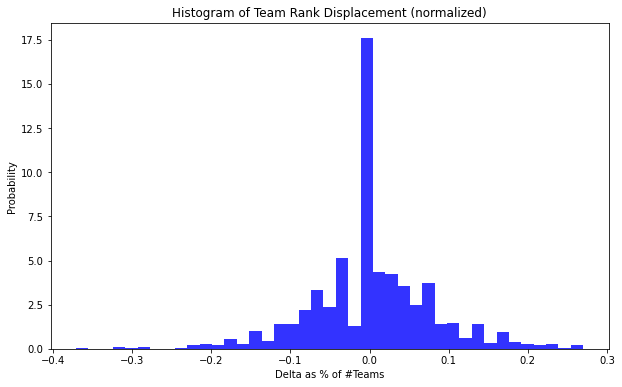

In [401]:
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(fuz, bins='auto', density=True, facecolor='blue', alpha=0.8)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Delta as % of #Teams')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (normalized)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

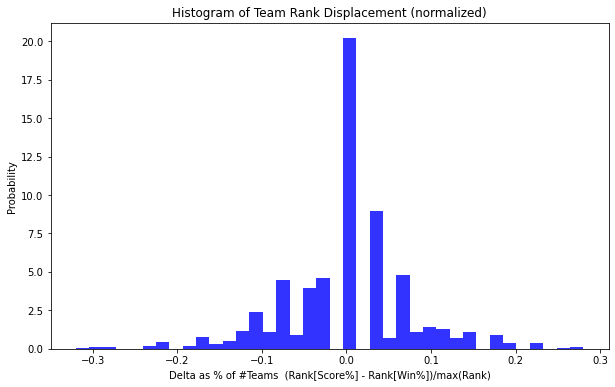

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(nba, bins='auto', density=True, facecolor='blue', alpha=0.8)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Delta as % of #Teams  (Rank[Score%] - Rank[Win%])/max(Rank)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (normalized)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

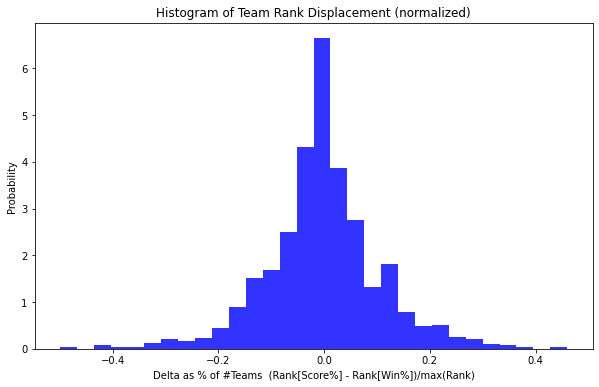

In [55]:
x=dlpctMLB
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(x, bins='scott', density=True, facecolor='blue', alpha=0.8)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Delta as % of #Teams  (Rank[Score%] - Rank[Win%])/max(Rank)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (normalized)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

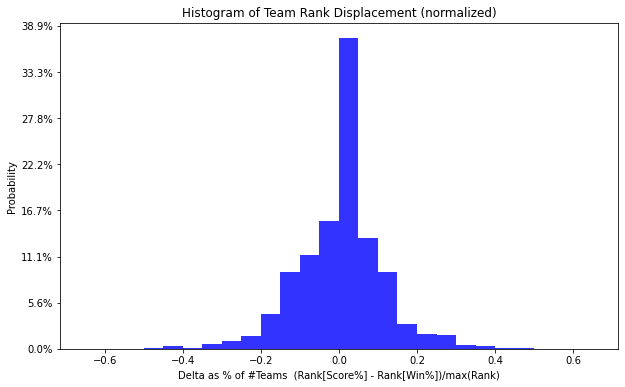

In [461]:
x=dlpctNFL
fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(x, bins=HIST_BINS, density=True, facecolor='blue', alpha=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(18))
plt.xlabel('Delta as % of #Teams  (Rank[Score%] - Rank[Win%])/max(Rank)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (normalized)')

plt.show

<AxesSubplot:ylabel='Probability'>

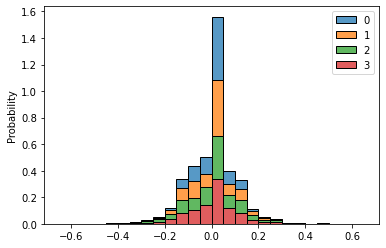

In [542]:
import seaborn as sns
sns.histplot([dlpctNBA,dlpctNHL,dlpctMLB,dlpctNFL],bins=HIST_BINS,stat="probability",common_norm=False,common_bins=False,multiple='stack')

<AxesSubplot:ylabel='Probability'>

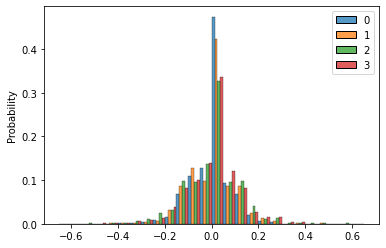

In [543]:
sns.histplot([dlpctNBA,dlpctNHL,dlpctMLB,dlpctNFL],bins=HIST_BINS,stat="probability",common_norm=False,common_bins=False,multiple='dodge')

In [452]:
HIST_BINS = np.linspace(-.65, .65, 27)
HIST_BINS

array([-0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25,
       -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
        0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65])